# Tugas Pertemuan 3 – Preprocessing & Modeling (FINAL)
**Dataset:** `dataset_perusahaan_klien_telat_20.csv`

Alur: **load → cek data → preprocessing (imputasi, encoding, scaling) → split → modeling → evaluasi → simpan gambar**.

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [10]:
dataset = pd.read_csv(r"D:\file tugas\Data Mining\dataset_perusahaan_klien_telat_20.csv")
dataset.head()

,ID,Batas_Kredit,Jenis_Kelamin,Pendidikan,Status_Pernikahan,Umur,Riwayat_Pembayaran_BulanLalu,Tagihan_Bulan1,Pembayaran_Bulan1,Status_Pembayaran
0,1,2000000,Laki-laki,2,Menikah,25,-1,500000,500000,Tepat
1,2,3500000,Perempuan,3,Belum Menikah,30,0,600000,600000,Tepat
2,3,5000000,Laki-laki,2,Menikah,28,1,450000,300000,Telat
3,4,1500000,Perempuan,1,Belum Menikah,35,2,700000,400000,Telat
4,5,2700000,Laki-laki,2,Menikah,40,0,800000,800000,Tepat


dataset_path = 'dataset_perusahaan_klien_telat_20.csv'
dataset = pd.read_csv(dataset_path)
dataset.head()

In [11]:
print("Info tipe kolom:")
print(dataset.dtypes)
print("\nCek missing value per kolom:")
print(dataset.isna().sum())
print("\nShape:", dataset.shape)
dataset.describe(include='all')

Info tipe kolom:
ID                               int64
Batas_Kredit                     int64
Jenis_Kelamin                   object
Pendidikan                       int64
Status_Pernikahan               object
Umur                             int64
Riwayat_Pembayaran_BulanLalu     int64
Tagihan_Bulan1                   int64
Pembayaran_Bulan1                int64
Status_Pembayaran               object
dtype: object

Cek missing value per kolom:
ID                              0
Batas_Kredit                    0
Jenis_Kelamin                   0
Pendidikan                      0
Status_Pernikahan               0
Umur                            0
Riwayat_Pembayaran_BulanLalu    0
Tagihan_Bulan1                  0
Pembayaran_Bulan1               0
Status_Pembayaran               0
dtype: int64

Shape: (20, 10)


,ID,Batas_Kredit,Jenis_Kelamin,Pendidikan,Status_Pernikahan,Umur,Riwayat_Pembayaran_BulanLalu,Tagihan_Bulan1,Pembayaran_Bulan1,Status_Pembayaran
count,20.00000,2.000000e+01,20,20.000000,20,20.000000,20.000000,20.00000,20.000000,20
unique,NaN,NaN,2,NaN,2,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Laki-laki,NaN,Menikah,NaN,NaN,NaN,NaN,Telat
freq,NaN,NaN,10,NaN,10,NaN,NaN,NaN,NaN,12
mean,10.50000,3.140000e+06,NaN,2.050000,NaN,32.550000,0.550000,633500.00000,488000.000000,NaN
std,5.91608,8.792341e+05,NaN,0.759155,NaN,6.361686,1.099043,109557.72331,172095.444755,NaN
min,1.00000,1.500000e+06,NaN,1.000000,NaN,22.000000,-1.000000,450000.00000,200000.000000,NaN
25%,5.75000,2.575000e+06,NaN,1.750000,NaN,27.750000,0.000000,565000.00000,375000.000000,NaN
50%,10.50000,3.050000e+06,NaN,2.000000,NaN,32.500000,0.500000,615000.00000,500000.000000,NaN
75%,15.25000,3.650000e+06,NaN,3.000000,NaN,37.250000,1.250000,702500.00000,600000.000000,NaN


In [12]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
categorical_cols = ['Jenis_Kelamin', 'Status_Pernikahan']
numeric_cols = [c for c in X.columns if c not in categorical_cols]
numeric_cols, categorical_cols

(['ID',
  'Batas_Kredit',
  'Pendidikan',
  'Umur',
  'Riwayat_Pembayaran_BulanLalu',
  'Tagihan_Bulan1',
  'Pembayaran_Bulan1'],
 ['Jenis_Kelamin', 'Status_Pernikahan'])

In [13]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Label encode target
le = LabelEncoder()
y_enc = le.fit_transform(y)
list(le.classes_)


['Telat', 'Tepat']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

X_train_proc = preprocess.fit_transform(X_train)
X_test_proc  = preprocess.transform(X_test)

X_train_proc = X_train_proc.toarray() if hasattr(X_train_proc, 'toarray') else X_train_proc
X_test_proc  = X_test_proc.toarray()  if hasattr(X_test_proc, 'toarray')  else X_test_proc

ohe = preprocess.named_transformers_['cat'].named_steps['onehot']
cat_feature_names = list(ohe.get_feature_names_out(categorical_cols))
feature_names = numeric_cols + cat_feature_names

print("Fitur numerik :", numeric_cols)
print("Fitur OneHot  :", cat_feature_names)
print("Shape train/test:", X_train_proc.shape, X_test_proc.shape)


Fitur numerik : ['ID', 'Batas_Kredit', 'Pendidikan', 'Umur', 'Riwayat_Pembayaran_BulanLalu', 'Tagihan_Bulan1', 'Pembayaran_Bulan1']
Fitur OneHot  : ['Jenis_Kelamin_Laki-laki', 'Jenis_Kelamin_Perempuan', 'Status_Pernikahan_Belum Menikah', 'Status_Pernikahan_Menikah']
Shape train/test: (16, 11) (4, 11)


In [15]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_proc, y_train)
y_pred_log = log_reg.predict(X_test_proc)

print("=== Logistic Regression ===")
print("Akurasi:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log, target_names=le.classes_, zero_division=0))

# Decision Tree
tree = DecisionTreeClassifier(random_state=42, max_depth=3)
tree.fit(X_train_proc, y_train)
y_pred_tree = tree.predict(X_test_proc)

print("=== Decision Tree ===")
print("Akurasi:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree, target_names=le.classes_, zero_division=0))


=== Logistic Regression ===
Akurasi: 0.5
              precision    recall  f1-score   support

       Telat       0.00      0.00      0.00         2
       Tepat       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4

=== Decision Tree ===
Akurasi: 0.5
              precision    recall  f1-score   support

       Telat       0.50      0.50      0.50         2
       Tepat       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4



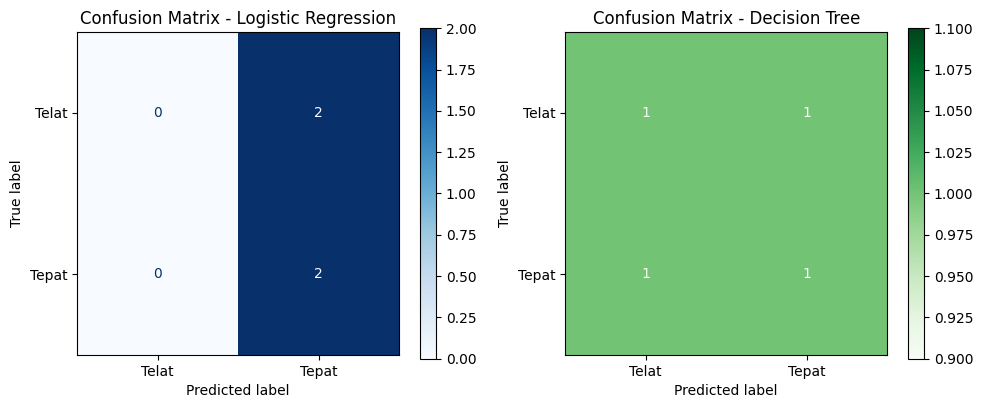

✅ Disimpan: confusion_matrix_models.png


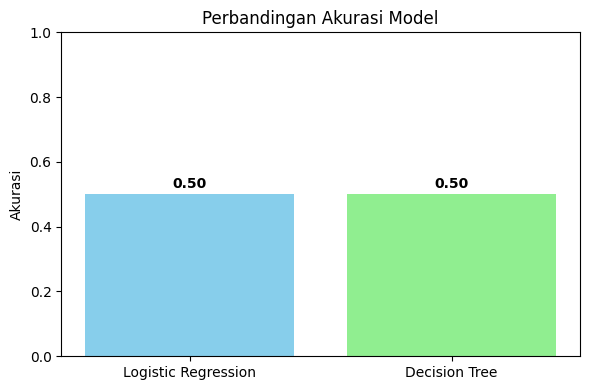

✅ Disimpan: perbandingan_akurasi.png


In [16]:
# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

ConfusionMatrixDisplay.from_estimator(
    log_reg, X_test_proc, y_test,
    display_labels=le.classes_, cmap="Blues", values_format='d', ax=axes[0]
)
axes[0].set_title("Confusion Matrix - Logistic Regression")

ConfusionMatrixDisplay.from_estimator(
    tree, X_test_proc, y_test,
    display_labels=le.classes_, cmap="Greens", values_format='d', ax=axes[1]
)
axes[1].set_title("Confusion Matrix - Decision Tree")

plt.tight_layout()
plt.savefig("confusion_matrix_models.png", dpi=300)
plt.show()
print("✅ Disimpan: confusion_matrix_models.png")

# Accuracy comparison
akurasi = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "Decision Tree": accuracy_score(y_test, y_pred_tree)
}

plt.figure(figsize=(6, 4))
bars = plt.bar(akurasi.keys(), akurasi.values(), color=['skyblue', 'lightgreen'])
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Akurasi")
plt.ylim(0, 1)
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, h+0.02, f"{h:.2f}", ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig("perbandingan_akurasi.png", dpi=300)
plt.show()
print("✅ Disimpan: perbandingan_akurasi.png")
